<h1>MLP Project T2 2023</h1>

Load csv data and convert sentiment column to 0/1 

In [1]:
import pandas as pd
import numpy as np
import re

# load data
movies = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
train = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
test = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

# shape before dropping duplicates
print(movies.shape)

# drop duplicates by id from movies
movies = movies.drop_duplicates(keep='first', subset=['movieid'], inplace=False)

# shape after dropping duplicates
print(movies.shape)

# convert sentiment to boolean
train['sentiment'] = train['sentiment'].apply(lambda sentiment : 1 if (sentiment == 'POSITIVE') else 0)

(143258, 14)
(126404, 14)


Merge the train and test data on movies data using below parameter
1. how = 'left' - to result df has same number of rows as train/test
2. on = 'movieid' - to merge dfs on the basis of movieid column

In [2]:
# shape before merge
print('train', train.shape)
print('test', test.shape)

# merge movies to train and test
train = train.merge(movies, 'left', 'movieid')
test = test.merge(movies, 'left', 'movieid')

# shape after merge
print('train', train.shape)
print('test', test.shape)

# columns of data
train.columns

train (162758, 5)
test (55315, 4)
train (162758, 18)
test (55315, 17)


Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

Show info of columns in train dataset

In [3]:
# check information of train dataset (column type and number of non-null points)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            156311 non-null  object 
 4   sentiment             162758 non-null  int64  
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  object 
 15  

Plot a seaborn pairplot and correlation heatmap between numerical columns </br>
['audienceScore','runtimeMinutes','sentiment']

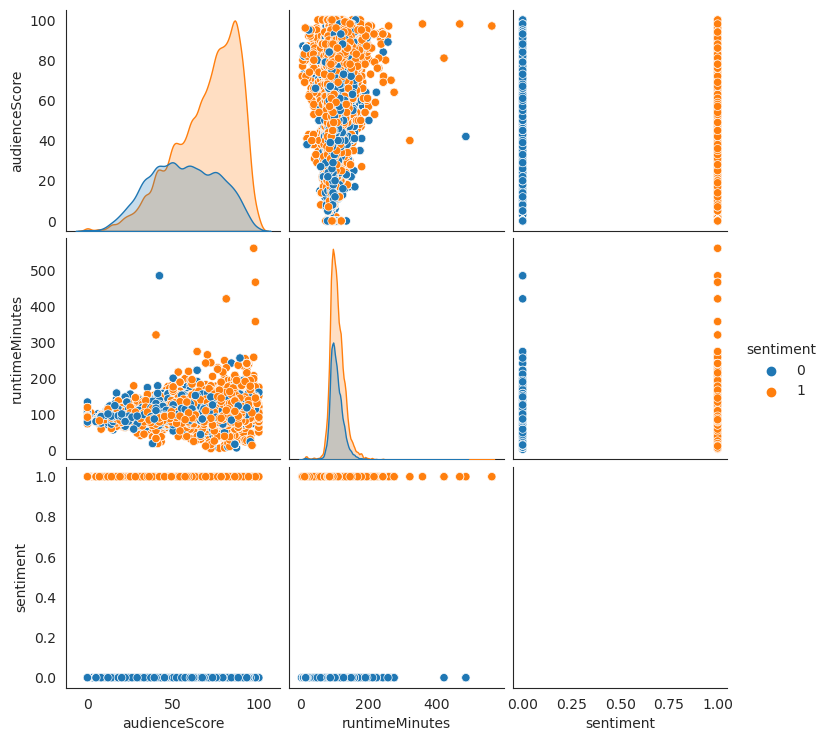

In [4]:
import seaborn
seaborn.set_style("white")

# pairplot
numerical_columns = ['audienceScore','runtimeMinutes','sentiment']
seaborn.pairplot(train, hue='sentiment', x_vars=numerical_columns, y_vars=numerical_columns)

<Axes: >

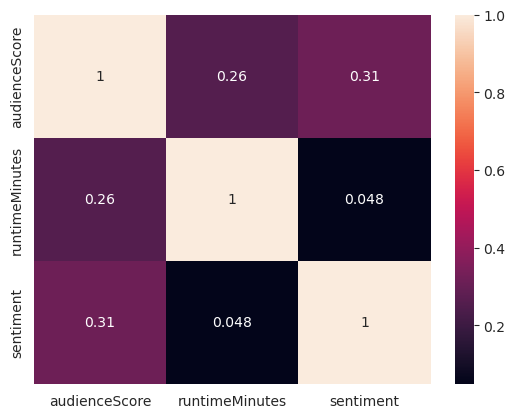

In [5]:
seaborn.heatmap(train[numerical_columns].corr(), annot=True)

Preprocess string columns for movie name and director name using one hot encoder
OHE parameters - 
1. handle_unknown = 'ignore' - to ignore nan values
2. sparse = True - to get sparse data in return 
3. dtype = int - to ensure integer datatype of result columns

In [6]:
# # create one-hot-encoders
# from sklearn.preprocessing import OneHotEncoder

# movieids = np.concatenate([train.movieid, test.movieid]).reshape(-1,1)
# directors = np.concatenate([train.director, test.director]).reshape(-1,1)

# movieid_ohe = OneHotEncoder(handle_unknown='ignore', sparse=True, dtype=int)
# director_ohe = OneHotEncoder(handle_unknown='ignore', sparse=True, dtype=int)

# movieid_ohe.fit(movieids)
# director_ohe.fit(directors)

# # One-hot-encode train.movieid and train.director
# train_movieid = movieid_ohe.transform(train.movieid.values.reshape(-1,1))
# test_movieid = movieid_ohe.transform(test.movieid.values.reshape(-1,1))
# train_director = director_ohe.transform(train.director.values.reshape(-1,1))
# test_director = director_ohe.transform(test.director.values.reshape(-1,1))

# # print number of ohe columns of movieid and director
# print('movieid - ', train_movieid.shape[1])
# print('director - ', train_director.shape[1])

Preprocess 'reviewText' column by lowering text and keeping only alphabetical characters and space </br>
Replace nan with empty review text

In [7]:
# clean reviewText by keeping only alphabets and space
keepAlhaNum = re.compile('[^a-z\s]+')

def process_text(text):
    if text is np.nan:
        return ''
    return re.sub(keepAlhaNum, '', text.lower())
    
train['reviewText'] = train['reviewText'].apply(process_text)
test['reviewText'] = test['reviewText'].apply(process_text)

Vecotrize 'reviewText' column with count-vectorizer with english stopwords

In [8]:
# # count vectorize reviewText
# from sklearn.feature_extraction.text import CountVectorizer

# count_vect = CountVectorizer(stop_words='english')

# train_words_matrix = count_vect.fit_transform(train['reviewText'])
# train_review_count = pd.DataFrame.sparse.from_spmatrix(train_words_matrix, columns=count_vect.get_feature_names_out())

# test_words_matrix = count_vect.transform(test['reviewText'])
# test_review_count = pd.DataFrame.sparse.from_spmatrix(test_words_matrix, columns=count_vect.get_feature_names_out())

Vecotrize 'reviewText' column with tfidf-vectorizer without stopwords

In [9]:
# # tfidf vectorize reviewText
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vect = TfidfVectorizer()

# train_words_matrix = tfidf_vect.fit_transform(train['reviewText'])
# train_review_tfidf = pd.DataFrame.sparse.from_spmatrix(train_words_matrix, columns=tfidf_vect.get_feature_names_out())

# test_words_matrix = tfidf_vect.transform(test['reviewText'])
# test_review_tfidf = pd.DataFrame.sparse.from_spmatrix(test_words_matrix, columns=tfidf_vect.get_feature_names_out())

Scale audiencescore using MinMax scaler and use sparse to ensure result matrix is sparse

In [10]:
# from sklearn.preprocessing import MinMaxScaler
# from scipy import sparse

# scaler = MinMaxScaler()

# audienceScores = np.concatenate([train.audienceScore, test.audienceScore]).reshape(-1,1)
# scaler.fit(audienceScores)

# train_audience_score = sparse.csr_matrix(np.nan_to_num(scaler.transform(train.audienceScore.values.reshape(-1,1)), nan=0, posinf=1, neginf=0))
# test_audience_score = sparse.csr_matrix(np.nan_to_num(scaler.transform(test.audienceScore.values.reshape(-1,1)), nan=0, posinf=1, neginf=0))

Concat intermediate resultant sparse matrices

In [11]:
# def concat_sparse(matrixes):
#     dfs = []
#     cols = 0
#     for index, matrix in enumerate(matrixes):
#         cols += matrix.shape[1]
#         if type(matrix).__module__ == np.__name__:
#             print('numpy data')
#             dfs.append(pd.DataFrame(matrix).add_prefix(f'{index}_'))
#         else:
#             print('df data')
#             dfs.append(pd.DataFrame.sparse.from_spmatrix(matrix).add_prefix(f'{index}_'))
#     return pd.concat(dfs, axis=1)

# train_data = concat_sparse([train_movieid, train_director, train_audience_score])
# test_data = concat_sparse([test_movieid, test_director, test_audience_score])

# print(train_data.shape)
# print(test_data.shape)

Now, we know what we have to do, let's try using Pipelines!
(we will also add imputer to pipelines)

In [12]:
# verify train test df shape
print(train.shape, test.shape)

# identified numerical and categorical columns
num_cols = ['audienceScore']
cat_cols = ['movieid', 'director']

# define pipelines using minmax for numerical, ohe for categorical with constant simple imputer for both and tfidf for text column

# import libraries for pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# pipeline for audienceScore column with imputer fill_value = 40
aud_pipeline = Pipeline(steps=[('impute', SimpleImputer(
    strategy='constant', fill_value=40)), ('minmax', MinMaxScaler())], verbose=True)

# generic pipeline for all categorical columns
cat_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='')), (
    'ohe', OneHotEncoder(handle_unknown='ignore', sparse=True, dtype=int))], verbose=True)

# pipeline to process text column using tfidf
tex_pipeline = Pipeline(steps=[('tfidf-vectorize', TfidfVectorizer())], verbose=True)


(162758, 18) (55315, 17)


Create column transformer using above defined pipelines

note - problem with tex_pipeline in column transformer, therefore processed seperately and hstacked

In [13]:
from sklearn.compose import ColumnTransformer

col_transformer = ColumnTransformer(transformers=[('aud_pipeline', aud_pipeline, ['audienceScore']), (
    'cat_pipeline', cat_pipeline, cat_cols)], remainder='drop', n_jobs=2, verbose=True)

We can now visualise column transformer and pipelines below

note - diagram is interactive, feel free to click and expand on it

In [14]:
from sklearn import set_config

set_config(display='diagram')
display(col_transformer), display(tex_pipeline)

ColumnTransformer(n_jobs=2,
                  transformers=[('aud_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value=40,
                                                                strategy='constant')),
                                                 ('minmax', MinMaxScaler())],
                                          verbose=True),
                                 ['audienceScore']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value='',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse=True))],
                                          verbose=True),
                                 ['movieid', 'director'])],
                  verbose=True)

Pipeline(steps=[('tfidf-vectorize', TfidfVectorizer())], verbose=True)

(None, None)

Split data into train, test sets

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    train, train['sentiment'], test_size=0.25, shuffle=True)

for df in [x_train, x_test, y_train, y_test]:
    print(df.shape)

(122068, 18)
(40690, 18)
(122068,)
(40690,)


Preprocess the split train data using defined pipelines and transformer

In [16]:
col_transformer.fit(x_train, y_train)
tex_pipeline.fit(x_train['reviewText'], y_train)

x_train_col = col_transformer.transform(x_train)
x_test_col = col_transformer.transform(x_test)

x_train_tf = tex_pipeline.transform(x_train['reviewText'])
x_test_tf = tex_pipeline.transform(x_test['reviewText'])

from scipy.sparse import hstack

x_train_res = hstack((x_train_col, x_train_tf))
x_test_res = hstack((x_test_col, x_test_tf))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[Pipeline] ... (step 1 of 1) Processing tfidf-vectorize, total=   3.4s


Reduce dimensionality of data using SelectKBest
(useful for models like knn and svc, which are time and resource heavy)

In [17]:
from sklearn.feature_selection import SelectKBest, chi2

k10k = SelectKBest(chi2, k=2500).fit(x_train_res, y_train)
x_train_10k = k10k.transform(x_train_res)
x_test_10k = k10k.transform(x_test_res)

Define models to train

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

log = LogisticRegression(random_state=0, verbose=10)
knn = KNeighborsClassifier()
svc = SVC(random_state=0, verbose=10)

Find score of individual models

In [19]:
# log.fit(x_train_res, y_train)
# print(log.score(x_test_res, y_test))

# knn.fit(x_train_10k, y_train)
# print(knn.score(x_test_10k, y_test))

# svc.fit(x_train_10k, y_train)
# print(svc.score(x_test_10k, y_test))

# # c:\Users\1mana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
# # STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

# # Increase the number of iterations (max_iter) or scale the data as shown in:
# #     https://scikit-learn.org/stable/modules/preprocessing.html
# # Please also refer to the documentation for alternative solver options:
# #     https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
# #   n_iter_i = _check_optimize_result(
# # [Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   21.3s
# # [Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   21.3s
# # 0.822732858196117
# # 0.7436962398623741
# # [LibSVM]0.7871467190956009

Compare models graphically

In [20]:
# import matplotlib.pyplot as plt
# import numpy as np

# from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)

# common_params = {
#     "X": x_train_res,
#     "y": y_train,
#     "score_type": "both",
#     "n_jobs": 4,
#     "line_kw": {"marker": "o"},
#     "std_display_style": "fill_between",
#     "score_name": "Accuracy",
# }

# for ax_idx, estimator in enumerate([log, knn, svc]):
#     LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
#     handles, label = ax[ax_idx].get_legend_handles_labels()
#     ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
#     ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

Logistic Regression seems to work best, let's optimise using Grid search cv

In [21]:
# from sklearn.model_selection import GridSearchCV

# params = {'C': [0.1, 1, 10], 'tol': [0.001, 0.0001, 0.00001], 'penalty': ['l1','l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 250, 1000]}

# log_search = GridSearchCV(log_opt, params, verbose=10, cv=3, n_jobs=3)
# log_search.fit(x_train_res, y_train)
# print(log_search.score(x_test_res, y_test))
# print(log_search.best_params_)

Use Optimised Logistic Regression on train data to predict test data

In [22]:
log_opt = LogisticRegression(random_state=0, verbose=10, max_iter=250, penalty='l2', solver='saga', C=1, tol=0.00001, warm_start=False)

log_opt.fit(x_train_res, y_train)
log_opt.score(x_test_res, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 66 epochs took 6 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s finished


0.8241091177193414

Compare log and log_opt graphically

In [23]:
# import matplotlib.pyplot as plt
# import numpy as np

# from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

# common_params = {
#     "X": x_train_res,
#     "y": y_train,
#     "score_type": "both",
#     "n_jobs": 4,
#     "line_kw": {"marker": "o"},
#     "std_display_style": "fill_between",
#     "score_name": "Accuracy",
# }

# for ax_idx, estimator in enumerate([log, log_opt]):
#     LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
#     handles, label = ax[ax_idx].get_legend_handles_labels()
#     ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
#     ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

Preprocess train and test data using pipelines

In [24]:
col_transformer.fit(train, train['sentiment'])
tex_pipeline.fit(train['reviewText'], train['sentiment'])

train_col = col_transformer.transform(train)
test_col = col_transformer.transform(test)

train_tf = tex_pipeline.transform(train['reviewText'])
test_tf = tex_pipeline.transform(test['reviewText'])

from scipy.sparse import hstack

train_res = hstack((train_col, train_tf))
test_res = hstack((test_col, test_tf))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[Pipeline] ... (step 1 of 1) Processing tfidf-vectorize, total=   4.5s


Use optimised Logistic Regression to get predictions

In [25]:
log_opt.fit(train_res, train['sentiment'])
test['sentiment'] = log_opt.predict(test_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 55 epochs took 6 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s finished


Save result to output csv

In [26]:
output = pd.DataFrame()
output['sentiment'] = test['sentiment'].apply(lambda prediction : 'POSITIVE' if prediction == 1 else 'NEGATIVE')
output['id'] = test.index
output.to_csv('output.csv',index=False, columns=['id', 'sentiment'])

---- End of main code ----

Attempts at Grid Search

In [27]:
# from sklearn.model_selection import GridSearchCV

# params = {'C': [0.1, 1, 10], 'tol': [0.001, 0.0001, 0.00001]}

# log_search = GridSearchCV(log_opt, params, verbose=10, cv=3, n_jobs=3)
# log_search.fit(x_train_res, y_train)
# print(log_search.score(x_test_res, y_test))
# print(log_search.best_params_)

# # Fitting 3 folds for each of 9 candidates, totalling 27 fits
# # convergence after 70 epochs took 8 seconds
# # 0.8212582944212338
# # {'C': 1, 'tol': 1e-05}
# # [Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s
# # [Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.5s

In [28]:
# from sklearn.model_selection import GridSearchCV

# grid_params = [{'clf': log, 'params': {'penalty': ['l1','l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [1, 10, 100, 250, 1000], 'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}}, {'clf': knn, 'params': {}}]

# params = {'penalty': ['l1','l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 250, 1000]}

# clf = GridSearchCV(log, params, verbose=10, cv=5, n_jobs=4)
# clf.fit(x_train_tfidf, y_train_tfidf)
# print(clf.score(x_test_tfidf, y_test_tfidf))
# print(clf.best_params_)
# print(clf.refit_time_)

# # Grid search on logistic regression with tfidf vectorized data

# # Fitting 5 folds for each of 12 candidates, totalling 60 fits
# # params = {'penalty': ['l1','l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 250, 1000]}

# # best params
# # {'max_iter': 250, 'penalty': 'l2', 'solver': 'saga'}

# # score
# # 0.8216269353649546

In [29]:
# # count vectorize reviewText

# from sklearn.feature_extraction.text import CountVectorizer

# count_vect = CountVectorizer(stop_words='english')

# train_words_matrix = count_vect.fit_transform(train['reviewText'])
# train_review_count = pd.DataFrame.sparse.from_spmatrix(train_words_matrix, columns=count_vect.get_feature_names_out())

# test_words_matrix = count_vect.transform(test['reviewText'])
# test_review_count = pd.DataFrame.sparse.from_spmatrix(test_words_matrix, columns=count_vect.get_feature_names_out())

In [30]:
# # best svc model

# from sklearn.svm import SVC

# svc = SVC()

# svc.fit(train_10k, y_train_count)
# svc.score(test_10k, y_test_count)

# # 0.7970017203244041

# svc.get_params()

# # {'C': 1.0,
# #  'break_ties': False,
# #  'cache_size': 200,
# #  'class_weight': None,
# #  'coef0': 0.0,
# #  'decision_function_shape': 'ovr',
# #  'degree': 3,
# #  'gamma': 'scale',
# #  'kernel': 'rbf',
# #  'max_iter': -1,
# #  'probability': False,
# #  'random_state': None,
# #  'shrinking': True,
# #  'tol': 0.001,
# #  'verbose': False}

In [31]:
# # attempt at decision tree

# from sklearn.tree import DecisionTreeClassifier

# dtc = DecisionTreeClassifier()

# dtc.fit(x_train_count, y_train_count)
# dtc.score(x_test_count, y_test_count)

# # 0.7123126075202753

In [32]:
# # attempt at mlp

# from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier()

# mlp.fit(train_10k, y_train_count)
# mlp.score(test_10k, y_test_count)

# # 0.7553944458097813

# mlp.get_params()

# # {'activation': 'relu',
# #  'alpha': 0.0001,
# #  'batch_size': 'auto',
# #  'beta_1': 0.9,
# #  'beta_2': 0.999,
# #  'early_stopping': False,
# #  'epsilon': 1e-08,
# #  'hidden_layer_sizes': (100,),
# #  'learning_rate': 'constant',
# #  'learning_rate_init': 0.001,
# #  'max_fun': 15000,
# #  'max_iter': 200,
# #  'momentum': 0.9,
# #  'n_iter_no_change': 10,
# #  'nesterovs_momentum': True,
# #  'power_t': 0.5,
# #  'random_state': None,
# #  'shuffle': True,
# #  'solver': 'adam',
# #  'tol': 0.0001,
# #  'validation_fraction': 0.1,
# #  'verbose': False,
# #  'warm_start': False}

In [33]:
# import matplotlib.pyplot as plt
# import numpy as np

# from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

# common_params = {
#     "X": x_train_res,
#     "y": y_train,
#     "score_type": "both",
#     "n_jobs": 4,
#     "line_kw": {"marker": "o"},
#     "std_display_style": "fill_between",
#     "score_name": "Accuracy",
# }

# for ax_idx, estimator in enumerate([log, log_opt]):
#     LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
#     handles, label = ax[ax_idx].get_legend_handles_labels()
#     ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
#     ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")